In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
df=pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [44]:
df.shape

(1154112, 7)

In [45]:
df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')

In [46]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime


df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [47]:
df['duration'].mean()

19.1672240937939

In [48]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

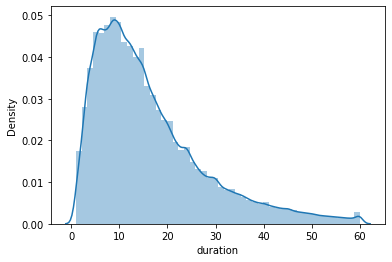

In [49]:
sns.distplot(df['duration'])

In [50]:
df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               927008
DOlocationID               147907
SR_Flag                   1109826
Affiliated_base_number        773
duration                        0
dtype: int64

In [51]:
round(100*(df.isnull().sum()/len(df.index)), 4)


dispatching_base_num        0.0000
pickup_datetime             0.0000
dropOff_datetime            0.0000
PUlocationID               83.5273
DOlocationID               13.3270
SR_Flag                   100.0000
Affiliated_base_number      0.0697
duration                    0.0000
dtype: float64

In [52]:
df['PUlocationID']=df['PUlocationID'].fillna('-1')
df['DOlocationID']=df['DOlocationID'].fillna('-1')

In [54]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].astype(str)

In [62]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107206316

In [63]:
r2_score(y_train, y_pred) 

0.16927348635153017

In [57]:
X_train.shape

(1109826, 525)

Validation set

In [67]:
def val_score(df):
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    df['PUlocationID']=df['PUlocationID'].fillna('-1')
    df['DOlocationID']=df['DOlocationID'].fillna('-1')
    
    categorical = ['PUlocationID', 'DOlocationID']

    df[categorical] = df[categorical].astype(str)
    
    train_dicts = df[categorical].to_dict(orient='records')
    target = 'duration'
    y_train = df[target].values

    X_train = dv.transform(train_dicts)

    y_pred = lr.predict(X_train)

    return mean_squared_error(y_train, y_pred, squared=False)
    
    

In [68]:
df1=pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [69]:
val_score(df1)

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1471/1359403803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUlocationID']=df['PUlocationID'].fillna('-1')
/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1471/1359403803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOlocationID']=df['DOlocationID'].fillna('-1')


11.014283149347039